# Лабораторная работа 1
### Выполнил студент группы 18 МАГ ИАД
#### Исаев Антон




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_csv('credit_card.csv', sep = ';', engine='python')

In [3]:
type(data)

pandas.core.frame.DataFrame

Задача - классификация оплаты по кредиту в следующем месяце (выплата произойдет/не произойдет) по набору данных заемщиков

In [6]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
print(data.shape)
print(data.columns)

(30000, 25)
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


Датасет состоит из 30000 обектов и 25 признаков 
1. **LIMIT_BAL** - велечина выданного кредита \n
2. **SEX** - пол заемщика
3. **EDUCATION** - Уровень образования (1 = graduate school; 2 = university; 3 = high school; 4 = others)
4. **MARRIAGE** - семейное положение (1 = married; 2 = single; 3 = others)
4. **AGE** - возраст
5. **PAY_0 - PAY_6** - статус по выплатам по месяцам(PAY_0 - за сентябрь 2005, PAY_6 - за август 2005)(-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above)
6. **BILL_AMT1 - BILL_AMT6** - размер ежемесячной выплаты от сентября 2005 по апрель 2005
7. **PAY_AMT1 - PAY_AMT6** - размер ежемесячного платежа
8. **default payment next month** - плата/не плата по кредиту (1-не плата, 2-плата)


In [10]:
data.index

RangeIndex(start=0, stop=30000, step=1)

In [19]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


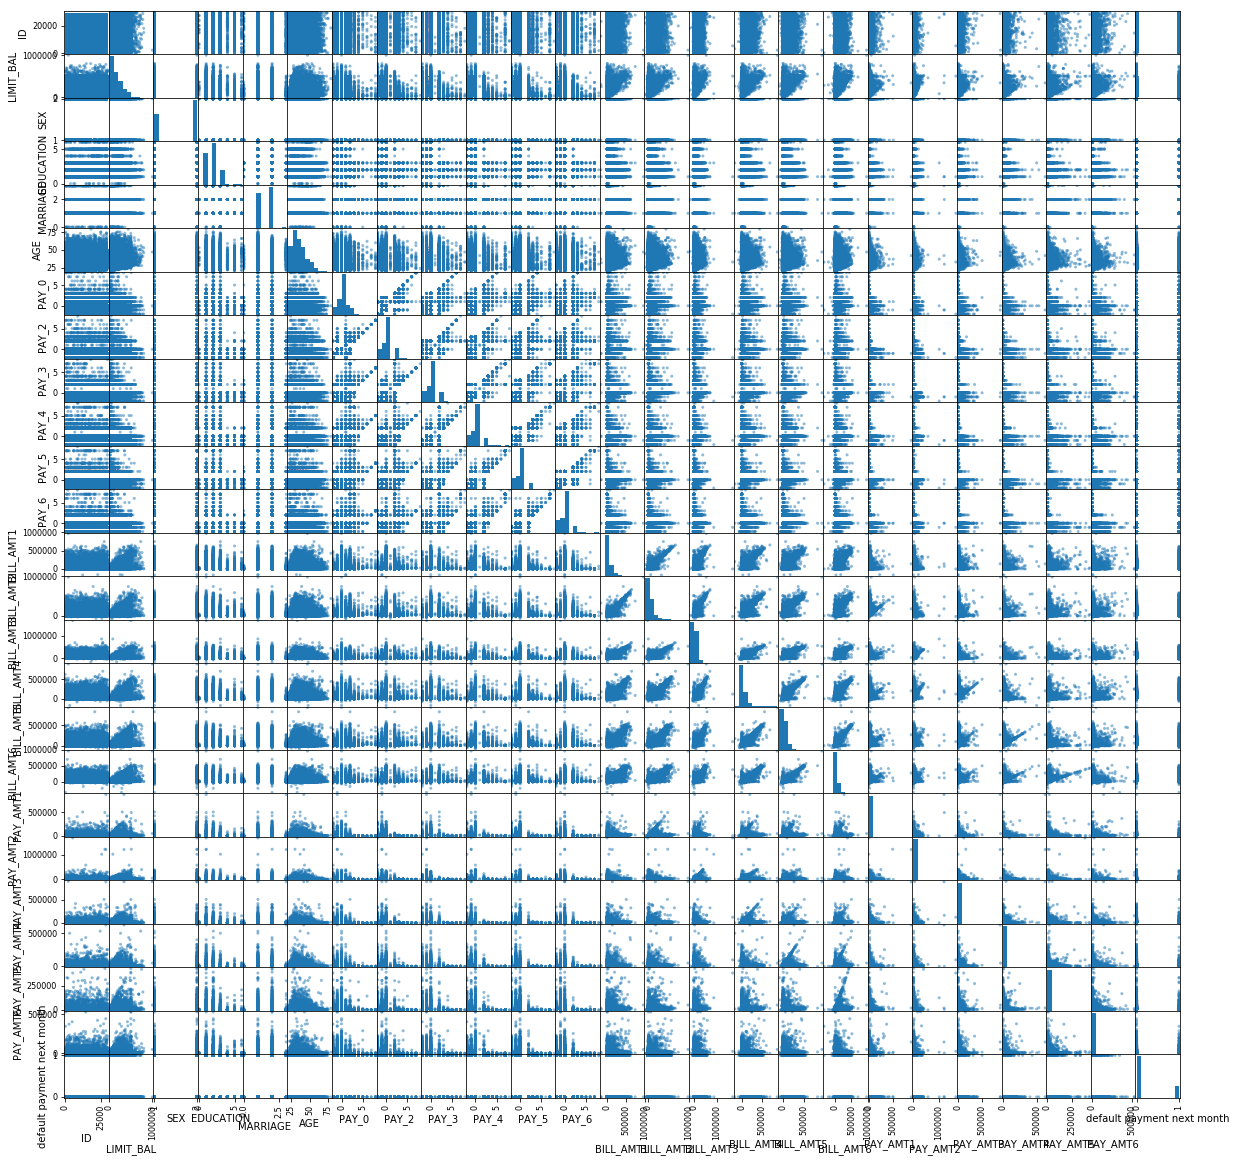

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .5, figsize = (20, 20))
pass

In [4]:
corr = data.corr()
corr

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


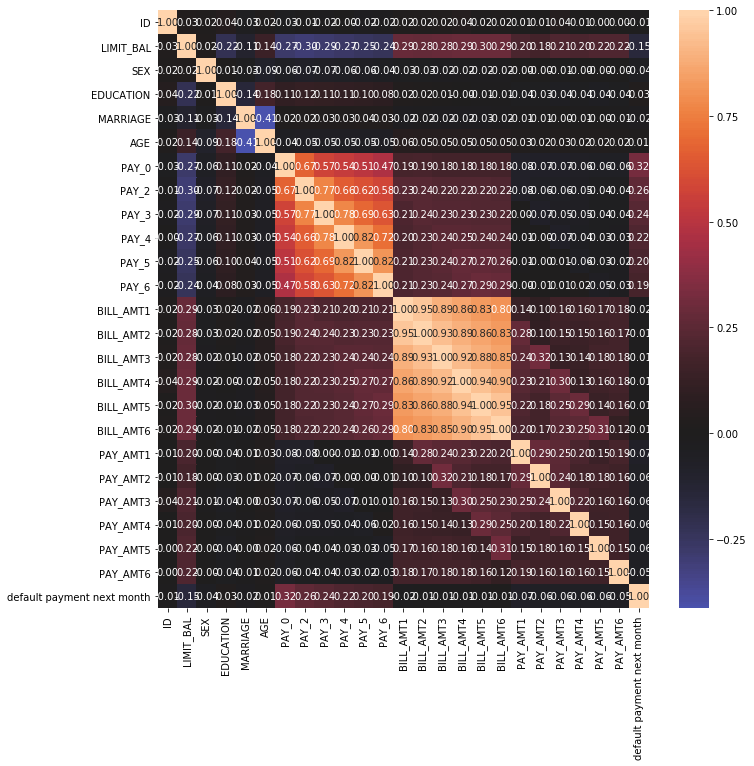

In [16]:
import seaborn as sns
plt.figure(figsize = (11,11))
sns.heatmap(corr, annot=True, fmt=".2f", center=0);

In [5]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [6]:
to_drop

['BILL_AMT2']

In [7]:
# Drop features 
data = data.drop('BILL_AMT2', axis=1)\
           .drop('BILL_AMT3', axis=1)\
           .drop('BILL_AMT6', axis=1)

In [8]:
for row in data.columns:
    for col in data.columns:
        if col == row:
            break
        if corr[row][col] >= 0.90:
            print(row + " - " + col)

BILL_AMT5 - BILL_AMT4


В результате построения корреляционной матрицы можно заметить, что значения для признаков размера ежемесячной оплаты по кредиту сильно коррелируют между собой собой.

**
Первичная обработка данных, работа с пропущенными значениями, векторизация**

In [9]:
data.describe(include = 'all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT1,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,51223.330900,43262.948967,40311.400967,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,73635.860576,64332.856134,60797.155770,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-165580.000000,-170000.000000,-81334.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,3558.750000,2326.750000,1763.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,22381.500000,19052.000000,18104.500000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,67091.000000,54506.000000,50190.500000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,964511.000000,891586.000000,927171.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [11]:
for c in numerical_columns:
    print(c, data[c].unique())

ID [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
AGE [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1

In [12]:
data[numerical_columns].count(axis = 0)

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

Как видно, в датасете нет пропущенных значений, но имеются категориальные признаки, следовательно, векторизация нужна в даном случае.

In [13]:
data[categorical_columns].count(axis = 0)

Series([], dtype: int64)

In [14]:
data.isnull().sum()/float(data.shape[0])

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

In [15]:
data_describe = data.describe(include = ['int64'])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [13]:
data.describe(include = ['int64'])

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT1,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,51223.330900,43262.948967,40311.400967,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,73635.860576,64332.856134,60797.155770,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-165580.000000,-170000.000000,-81334.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,3558.750000,2326.750000,1763.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,22381.500000,19052.000000,18104.500000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,67091.000000,54506.000000,50190.500000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,964511.000000,891586.000000,927171.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [16]:
# Удаляем столбец 'ID', дублирующий индексы
# data = data.drop('ID', axis = 1)
# Изменяем значения столбца 'SEX' = 2 (Female) -> 0
data[data['SEX'] == 2] = 0

## Векторизация

In [17]:
binary_columns    = ['SEX', 'default payment next month']
nonbinary_columns = ['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',\
                     'PAY_6']
print(binary_columns, nonbinary_columns)

['SEX', 'default payment next month'] ['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


# Бинаризация исправлена

In [18]:
data_nonbinary= pd.get_dummies(data=data[nonbinary_columns], columns=nonbinary_columns)
print(data_nonbinary)

       EDUCATION_0  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0                1            0            0            0            0   
1                1            0            0            0            0   
2                1            0            0            0            0   
3                1            0            0            0            0   
4                0            0            1            0            0   
5                0            1            0            0            0   
6                0            1            0            0            0   
7                1            0            0            0            0   
8                1            0            0            0            0   
9                0            0            0            1            0   
10               1            0            0            0            0   
11               1            0            0            0            0   
12               1            0       

## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [19]:
numerical_columns = ['LIMIT_BAL', 'BILL_AMT1',\
                     'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1',\
                     'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',\
                     'PAY_AMT6']
data_numerical = data[numerical_columns]

#data_numerical.describe()

# Preprocessing test

In [20]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data[numerical_columns])
data_scaled[0]

array([-0.5525401 , -0.38782172, -0.37373765, -0.36864573, -0.21740336,
       -0.19716995, -0.18145219, -0.18039454, -0.1922363 , -0.17272734])

In [21]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [22]:
data_numerical.describe()

,LIMIT_BAL,BILL_AMT1,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2.769869e-15,1.972128e-15,3.435230e-15,1.351593e-15,1.258888e-16,7.325268e-16,1.197268e-15,1.452324e-15,3.499338e-15,-4.227405e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.525309e-01,-3.373180e+00,-3.936645e+00,-1.741486e+00,-2.173997e-01,-1.971667e-01,-1.814492e-01,-1.803915e-01,-1.922331e-01,-1.727245e-01
25%,-5.525309e-01,-3.878153e-01,-3.737314e-01,-3.686396e-01,-2.173997e-01,-1.971667e-01,-1.814492e-01,-1.803915e-01,-1.922331e-01,-1.727245e-01
50%,-5.525309e-01,-3.878153e-01,-3.737314e-01,-3.686396e-01,-2.173997e-01,-1.971667e-01,-1.814492e-01,-1.803915e-01,-1.922331e-01,-1.727245e-01
75%,1.296328e-01,-1.523288e-01,-1.599461e-01,-1.627753e-01,-6.661134e-02,-7.521227e-02,-9.684942e-02,-1.037985e-01,-1.103910e-01,-1.148958e-01
max,6.269106e+00,1.307705e+01,1.280274e+01,1.805334e+01,4.865817e+01,3.220096e+01,4.281459e+01,4.926708e+01,3.314712e+01,4.337583e+01


## Соединяем все в одну таблицу

In [23]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(30000, 86)


# X и y
Отделим столбец с значением оплаты/не оплаты по кредиту от таблицы атрибутов объектов, к которым была применена нормализация данных, делим выборку на тренировочную и тестовую.

In [25]:
X = data.drop(('default payment next month'), axis = 1) # выбрасываем столбец 'class'
y = data['default payment next month']
feature_names = X.columns

In [26]:
feature_names

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2',
       'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4',
       'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1',
       'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6',
       'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1', 

In [27]:
print(X.shape)
print(y.shape)
N, d = X.shape

(30000, 85)
(30000,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

21000 9000


# $k$NN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [42]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0739047619047619 0.08744444444444445


Для оценки качества классификатора посчитаем значения ошибок на тренировочной и тестовой выборке для различного значения **n**:
1. **n = 2**: 0.05657142857142857 0.09222222222222222
2. **n = 3**: 0.05757142857142857 0.09933333333333333
3. **n = 4**: 0.06623809523809523 0.091
4. **n = 5**: 0.06604761904761905 0.09422222222222222
5. **...**
6. **n = 10**: 0.07404761904761904 0.08766666666666667

In [43]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [44]:
err_test

0.08744444444444444

In [70]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[7967  188]
 [ 603  242]]


### Подбор параметров
Для более точного обучения модели необходимо подобрать оптимальное количество соседей

In [72]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.07904761904761903 55


Оптимальное значение соседей для метода kNN равно 55, обеспечивающее максимальную точность на тестовой выборке.

In [73]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.077 0.08266666666666667


# SVC
Построим классификатор методом опорных векторов

In [74]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.07157142857142858 0.08211111111111111


Стоит отметить, что данный классификатор с значениями параметров по умолчанию работате чуть хуже чем kNN классификатор для тестовой выборки, но для тренировочной лучше. Также стоит попробовать подобрать оптимальные параметры для классификатора

### Подбор параметров

In [75]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.07790476190476192 10000.0


In [76]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.077 0.08266666666666667


Как оказалось классификатор SVC выдал такой же результат, как и классификатор kNN

# Random Forest
Построим классификатор Random Forest для нашей задачи классификации

In [69]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0014285714285714286 0.084


### Значимость признаков
Проверим показатели значимости признаков для построенной модели

In [78]:
np.sum(rf.feature_importances_)

1.0000000000000004

In [79]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'PAY_0' (0.111411)
 2. feature 'LIMIT_BAL' (0.075897)
 3. feature 'BILL_AMT1' (0.062235)
 4. feature 'PAY_2' (0.057322)
 5. feature 'BILL_AMT2' (0.054623)
 6. feature 'BILL_AMT3' (0.051914)
 7. feature 'BILL_AMT4' (0.050855)
 8. feature 'PAY_AMT1' (0.048084)
 9. feature 'BILL_AMT6' (0.047327)
10. feature 'EDUCATION' (0.046458)
11. feature 'BILL_AMT5' (0.045951)
12. feature 'PAY_AMT2' (0.044203)
13. feature 'PAY_AMT3' (0.041568)
14. feature 'PAY_AMT6' (0.040577)
15. feature 'PAY_3' (0.039351)
16. feature 'PAY_AMT5' (0.039326)
17. feature 'PAY_AMT4' (0.039130)
18. feature 'MARRIAGE' (0.033268)
19. feature '  SEX' (0.019311)
20. feature 'PAY_4' (0.017576)
21. feature 'PAY_5' (0.017231)
22. feature 'PAY_6' (0.016384)


(-1, 20)

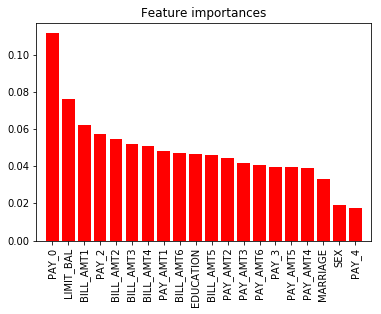

In [81]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Как можно сделать вывод из представленных выше данных, все признаки являются достаточно значимыми для данной модели. При этом немного выделяется признак PAY_0, так как имеет самый высокий показатель
Но при этом параметры PAY_4 и SEX практически не несут значимости

# Extremely Randomized Trees

Построим классификатор Extremely Randomized Trees для нашей задачи классификации

In [82]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0014285714285714286 0.08533333333333333


Данный классификатор показал ошибку 0.001, что является наименьшим значнием ошибки на тренировочной выборке среди примененных классификаторов, но при этом значние ошибки для тестовой выборки больше, чем у лидера - классификатора kNN: 0.085 против 0.08266 

# AdaBoost
Построим классификатор AdaBoost для нашей задачи классификации

In [70]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.07004761904761905 0.08211111111111111


Данный классификтор выдает значение ошибки для тестовой выборки меньше, чем у классификатора kNN: 0.0821 против 0.08266 

In [72]:
y_test_pred = rf.predict(X_test)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      8155
          1       0.58      0.38      0.46       845

avg / total       0.90      0.92      0.91      9000



Из данной таблицы видно, что хуже всего классификатор работает со значение **не выплаты** кредита, в то же время для значения **выплаты** кредита работает очень хорошо.

# GBT
Построим классификатор GBT для нашей задачи классификации

In [84]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.04285714285714286 0.08388888888888889


# Лабораторная работа №2

# Neural Net

Обучаем классификатор

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'relu', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [26]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [27]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.04733333333333333 0.09766666666666667


In [29]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

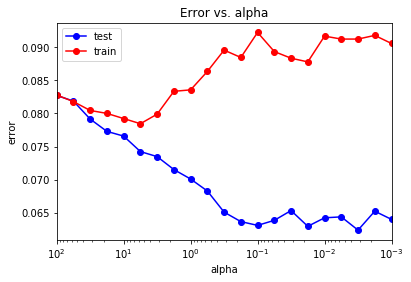

In [30]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [31]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.062380952380952384 0.07844444444444444


In [32]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[5.62341325]


In [33]:
alpha_opt = alpha_opt[0]

In [34]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.07423809523809524
0.07844444444444444


In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[7997  548]
 [ 158  297]]


Подберем оптимальное количество нейронов

In [ ]:
neurons = np.arange(1,100,2)
test_err = []
train_err = []
for neuron_size in neurons:
    hidden_layer_sizes = (neuron_size,)
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = hidden_layer_sizes, 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

In [ ]:
plt.semilogx(neurons, train_err, 'b-o', label = 'train')
plt.semilogx(neurons, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neurons), np.min(neurons)])
plt.title('Error vs. Neurons size')
plt.xlabel('neurons size')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

Оптимальное количество нейронов

In [ ]:
index = test_err.index(min_test_err)
neuron_size_opt = neurons[index]
print(neuron_size_opt)

### Классификатор при найденных оптимальных значениях гиперпараметров:

2 скрытых слоя:

In [ ]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_size_opt,neuron_size_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

In [ ]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_size_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

In [ ]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [ ]:
print(confusion_matrix(y_test_pred, y_test))

Наименьшая ошибка на тестовой выборке = 0.07744444444444444 получилось у нейронной сети с одним скрытым слоем. У полученной модели отсутствует переобучение/недообучение. Так как данные несбалансированы, то оприсутствует высокая вероятность допустить ошибку второго рода. Нейронная сеть улучшила результаты по сравнению с предыдущими классификаторами примерно на 0.05.

# Лабораторная работа №3

Обучить на ваших данных:
* random forests
* extremely random forests
* adaboost
* gradient boosted trees

In [50]:
from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

Определим количество деревьев в классификаторах

In [51]:
tree_arr = np.logspace(0, 3, 30)

In [52]:
print(tree_arr)

[   1.            1.268961      1.61026203    2.04335972    2.5929438
    3.29034456    4.17531894    5.29831691    6.72335754    8.53167852
   10.82636734   13.73823796   17.43328822   22.12216291   28.07216204
   35.6224789    45.20353656   57.3615251    72.78953844   92.36708572
  117.21022975  148.73521073  188.73918221  239.502662    303.91953823
  385.66204212  489.39009185  621.01694189  788.04628157 1000.        ]


## Random Forest

In [76]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0014285714285714286 0.08333333333333333


Ошибка для тренировочной выборки значительно меньше, чем ошибка для тестовой выборки. Из этого можно сделать вывод, что имеется переобучение в данной модели.

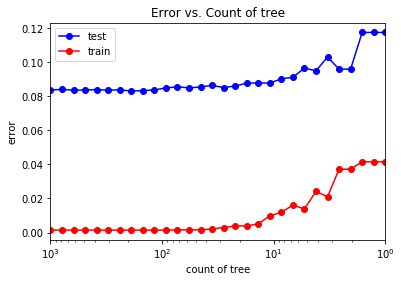

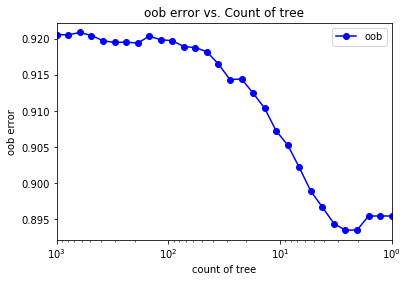

In [53]:
err_test = []
err_train = []
oob_scores = []
for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators=int(tree),oob_score=True,random_state=42)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    err_train.append(np.mean(y_train.values.ravel() != y_train_pred))
    err_test.append(np.mean(y_test.values.ravel() != y_test_pred))
    oob_scores.append(rf.oob_score_) 
    
plt.figure(1)
plt.semilogx(tree_arr, err_test, 'b-o', label = 'test')
plt.semilogx(tree_arr, err_train, 'r-o', label = 'train')
plt.xlim([np.max(tree_arr), np.min(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()

plt.figure(2)
plt.semilogx(tree_arr, oob_scores, 'b-o', label = 'oob')
plt.xlim([np.max(tree_arr), np.min(tree_arr)])
plt.title('oob error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('oob error')
plt.legend()
pass

In [61]:
print('min error:', np.min(err_train), np.min(err_test))

min error: 0.0014285714285714286 0.083


Переобучение сохраняется при любых значениях количества решающих деревьев

## Extremely Random Forest

In [63]:
etc = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != etc.predict(X_train))
err_test  = np.mean(y_test  != etc.predict(X_test))

print(err_train, err_test)

0.0014285714285714286 0.0898888888888889


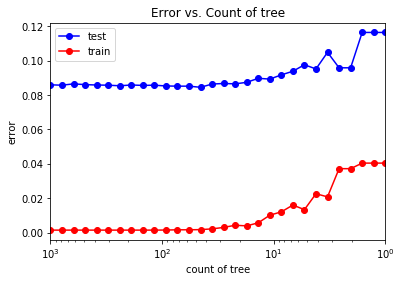

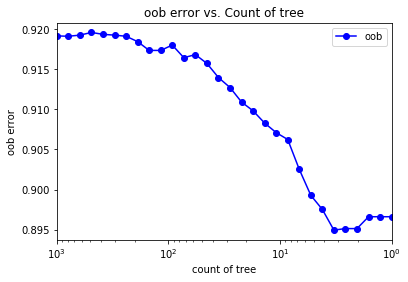

In [64]:
oob_scores = []
err_test = []
err_train = []
for tree in tree_arr:
    rf = ensemble.ExtraTreesClassifier(n_estimators =int(tree),oob_score=True,bootstrap=True,random_state=42)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    err_train.append(np.mean(y_train.values.ravel() != y_train_pred))
    err_test.append(np.mean(y_test.values.ravel() != y_test_pred))
    oob_scores.append(rf.oob_score_) 
    
plt.figure(1)
plt.semilogx(tree_arr, err_test, 'b-o', label = 'test')
plt.semilogx(tree_arr, err_train, 'r-o', label = 'train')
plt.xlim([np.max(tree_arr), np.min(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()

plt.figure(2)
plt.semilogx(tree_arr, oob_scores, 'b-o', label = 'oob')
plt.xlim([np.max(tree_arr), np.min(tree_arr)])
plt.title('oob error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('oob error')
plt.legend()
pass

In [65]:
print('min error:', np.min(err_train), np.min(err_test))

min error: 0.0014285714285714286 0.08444444444444445


Для Extremely Random Forest наблюдается схожее поведение(переобучение) в полученной модели, с тем же количеством решающих деревьев. 

## AdaBoost

In [66]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.07142857142857142 0.08333333333333333


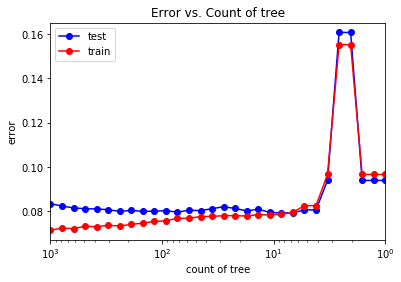

In [67]:
err_test = []
err_train = []
for tree in tree_arr:
    rf = ensemble.AdaBoostClassifier(n_estimators = int(tree))
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    err_train.append(np.mean(y_train.values.ravel() != y_train_pred))
    err_test.append(np.mean(y_test.values.ravel() != y_test_pred))   

plt.semilogx(tree_arr, err_test, 'b-o', label = 'test')
plt.semilogx(tree_arr, err_train, 'r-o', label = 'train')
plt.xlim([np.max(tree_arr), np.min(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

In [68]:
print('min error:', np.min(err_train), np.min(err_test))

min error: 0.07142857142857142 0.07922222222222222


Модель AdaBoost не сильно улучшает точность на тестовой выборке, но при этом переобучения, которое присутствовало на двух предыдущих моделях, уже нет

## Gradient Boosted Trees

In [69]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.046047619047619046 0.08422222222222223


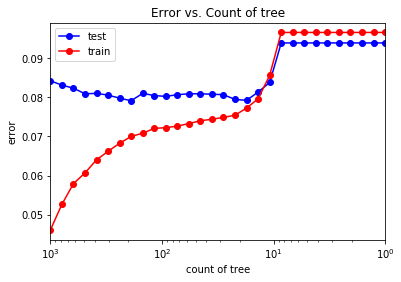

In [70]:
err_test = []
err_train = []
for tree in tree_arr:
    rf = ensemble.GradientBoostingClassifier(n_estimators = int(tree))
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    err_train.append(np.mean(y_train.values.ravel() != y_train_pred))
    err_test.append(np.mean(y_test.values.ravel() != y_test_pred))
    
plt.figure(1)
plt.semilogx(tree_arr, err_test, 'b-o', label = 'test')
plt.semilogx(tree_arr, err_train, 'r-o', label = 'train')
plt.xlim([np.max(tree_arr), np.min(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

In [71]:
print('min error:', np.min(err_train), np.min(err_test))

min error: 0.046047619047619046 0.0791111111111111


При увеличении количества решающих деревьев заметно переобучение для данной модели, а также следует отметить постепенное уменьшение точности работы модели на тестовой выборке.

## Выводы 

Среди 4 моделей, использующих решающие деревья, лучшей оказался AdaBoost с точностью **0.0714** и **0.0792** на обучающей и тестовой выборках соответственно. Этот результат оказался хуже чем модель с нейронной сетью на **0.02** на тестовой выборке. Эти два процента важны как раз в задаче по определению вероятности выплаты по кредиту.

Увеличение количества решающих деревьев с определенного момента не приносит увеличения точности, как этого бы хотелось. Так как количество деревьев в качестве параметра бралось не по порядку, а на интервале, то результаты получились не совсем точными. Поэтому стоит подбирать этот параметр именно в окрестности того количества деревьев, где точность была наилучшей.

# Ссылка на продолжение проекта в Microsoft Azure:
[![Azure Notebooks](https://notebooks.azure.com/launch.svg)](https://notebooks.azure.com/qm2812/projects/machine-learning)